In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

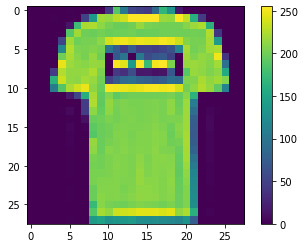

In [30]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images = train_images/255
test_images = test_images/255

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation= 'relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8638
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8761
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3118 - accuracy: 0.8859
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2940 - accuracy: 0.8911
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2797 - accuracy: 0.8964


In [36]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print('test accuracy:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8750
test accuracy: 0.875


In [37]:
predictions=model.predict(test_images)
print(predictions[0])

[6.3126393e-08 2.9719720e-11 3.2981082e-09 2.9261879e-10 2.6048017e-09
 5.7900478e-03 2.8051408e-08 5.1657666e-02 6.0255502e-08 9.4255209e-01]


Ankle boot


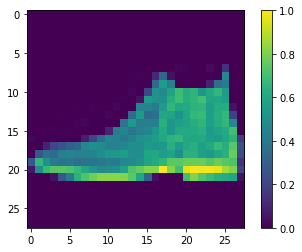

In [40]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 20


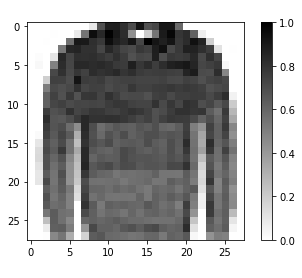

In [42]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)